# Libraries

In [9]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import neurokit2 as nk

import sys, os
sys.path.append(os.path.relpath("../src/"))
import emg

# Functions

In [2]:
## Load data functions

def load_data_no_folds(scenario_dir_path, dataset_type):
    # make dict to store data
    storage_list = list()
    # make paths for the specified dataset
    train_annotations_dir = Path(scenario_dir_path, dataset_type, "annotations")
    train_physiology_dir = Path(scenario_dir_path, dataset_type, "physiology")
    # sort contents of dirs, so that physiology and annotations are in the same order  
    train_physiology_files = sorted(Path(train_physiology_dir).iterdir())
    train_annotation_files = sorted(Path(train_annotations_dir).iterdir())
    # iterate over annotation and physiology files
    for physiology_file_path, annotations_file_path in zip(train_physiology_files, train_annotation_files):
        # make sure that we load corresponding physiology and annotations
        assert physiology_file_path.name == annotations_file_path.name, "Order mismatch"
        # load data from files
        df_physiology = pd.read_csv(physiology_file_path, index_col="time")
        df_annotations = pd.read_csv(annotations_file_path, index_col="time")
        # store data
        storage_list.append((annotations_file_path.name, df_physiology, df_annotations))
    return storage_list

def load_data_with_folds(scenario_dir_path, dataset_type):
    # make dict to store data
    storage_dict = dict()
    # iterate over the scenario directory
    for fold_dir in Path(scenario_dir_path).iterdir():
        # make paths for current fold
        train_annotations_dir = Path(fold_dir, f"{dataset_type}/annotations/")
        train_physiology_dir = Path(fold_dir, f"{dataset_type}/physiology/")
        # make key in a dict for current fold 
        storage_dict.setdefault(fold_dir.name, list())
        # sort contents of dirs, so that physiology and annotations are in the same order  
        train_physiology_files = sorted(Path(train_physiology_dir).iterdir())
        train_annotation_files = sorted(Path(train_annotations_dir).iterdir())
        # iterate over annotation and physiology files
        for physiology_file_path, annotations_file_path in zip(train_physiology_files, train_annotation_files):
            # make sure that we load corresponding physiology and annotations
            assert physiology_file_path.name == annotations_file_path.name, "Order mismatch"
            # load data from files
            df_physiology = pd.read_csv(physiology_file_path, index_col="time")
            df_annotations = pd.read_csv(annotations_file_path, index_col="time")
            # store data
            storage_dict[fold_dir.name].append((annotations_file_path.name, df_physiology, df_annotations))
    return storage_dict

## Plotting functions
def plot_data(modality, annotations, physiology, test=False):
    fig = plt.figure(figsize=(16,8))
    fig.patch.set_facecolor('white')
    # plot train physiology with annotations range 
    plt.subplot(211)
    plt.plot(physiology.index, physiology[modality])
    plt.axvspan(annotations.index[0], annotations.index[-1], color='green', alpha=0.3)
    plt.xlim(left=physiology.index[0], right=physiology.index[-1])
    plt.title(f"{test * 'Test' + (not test) * 'Training'} data", fontsize=20)
    plt.ylabel("Signal value", fontsize=16)
    plt.xlabel("Time", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # plot train annotations
    plt.subplot(212)
    plt.plot(annotations.index, annotations['arousal'], label='arousal - train')
    plt.plot(annotations.index, annotations['valence'], label='valence - train')
    plt.xlim(left=physiology.index[0], right=physiology.index[-1])
    plt.legend(fontsize=14)
    plt.ylabel("Annotation value", fontsize=16)
    plt.xlabel("Time", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

# Plot from neurokit
def plot_emg(data, fs=1000):
    # Process the raw EDA signal
    # emg_signals, _ = nk.emg_process(data, sampling_rate=fs)
    emg_signals, _ = emg.process(data, sampling_rate=fs, filterCutoff=1.0)
    # Visualize cleaned EMG signal
    plot = nk.emg_plot(emg_signals)

# Loading data

In [3]:
# specify scenario path
scenario_dir = "../data/scenario_1"

# train data
print("Loading train data")
train = load_data_no_folds(scenario_dir, "train")

# test data
print("Loading test data")
test = load_data_no_folds(scenario_dir, "test")

Loading train data
Loading test data


# Processing tests

In [11]:
df, info = emg.emg_process(train[0][1].emg_coru, threshold=3, sampling_rate=1000)
info

{'EMG_Onsets': array([   738,   2032,   2182,  10901,  11286,  15624,  18187,  19504,
         31643,  35005,  35497,  37265,  41292,  42009,  42196,  43127,
         43616,  44611,  44793,  45174,  45372,  46818,  48155,  48442,
         50281,  50663,  53430,  54540,  56015,  57907,  58827,  59447,
         59602,  59904,  60992,  61150,  65004,  65214,  65495,  66099,
         66286,  66530,  68993,  70327,  70575,  73773,  75165,  76040,
         78265,  80201,  81017,  81966,  82306,  82513,  83355,  84820,
         85211,  85761,  89113,  89394,  94972,  95084,  96215,  98537,
         99723, 100659]),
 'EMG_Offsets': array([   876,   2114,   2260,  10975,  11350,  15695,  18261,  19569,
         31727,  35179,  35605,  37347,  41359,  42085,  42301,  43179,
         43692,  44673,  44898,  45249,  45628,  46888,  48214,  48529,
         50364,  50721,  53496,  54727,  56076,  57973,  58931,  59507,
         59770,  59965,  61068,  61300,  65062,  65266,  65587,  66161,
         

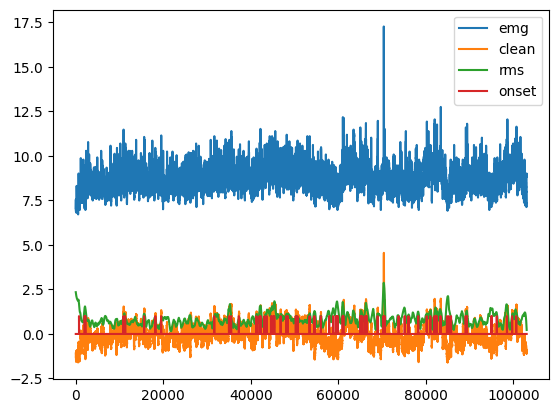

In [12]:
plt.plot(df.EMG_Raw, label='emg')
plt.plot(df.EMG_Clean, label='clean')
plt.plot(df.EMG_Rms, label='rms')
plt.plot(df.EMG_Onsets, label='onset')
plt.legend()

In [10]:
nk.emg_analyze(df, sampling_rate=1000)

,EMG_Activation_N,EMG_Amplitude_Mean
0,5.0,0.021298


# Plot data and ratings

sub_11_vid_1.csv


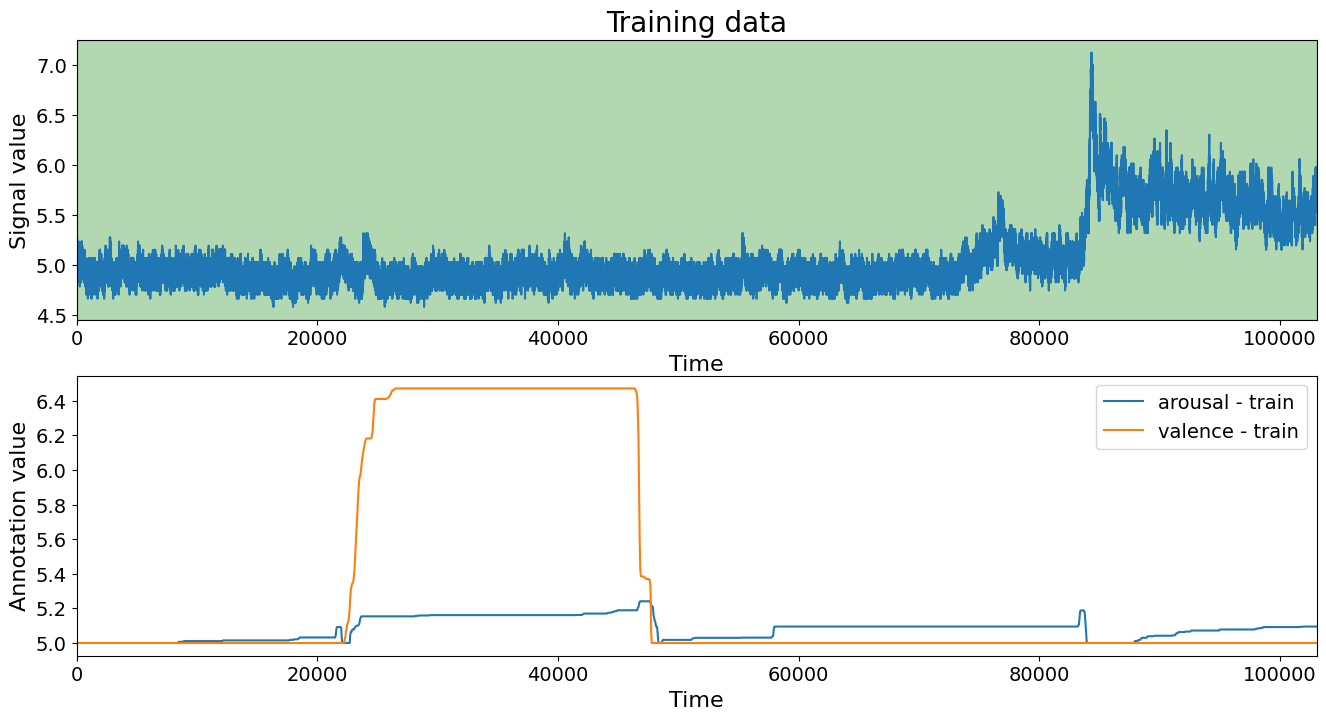

<Figure size 640x480 with 0 Axes>

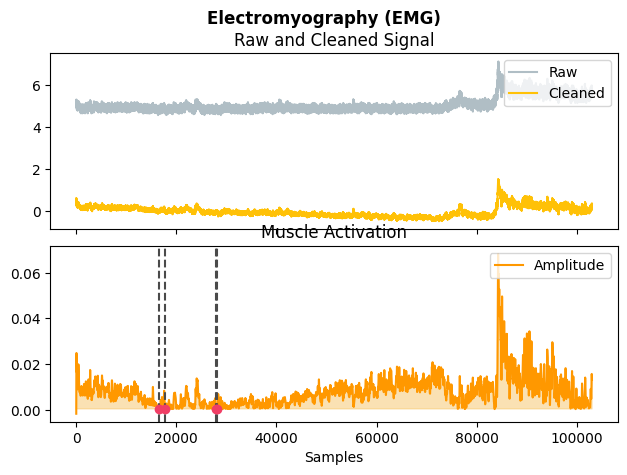

sub_11_vid_10.csv


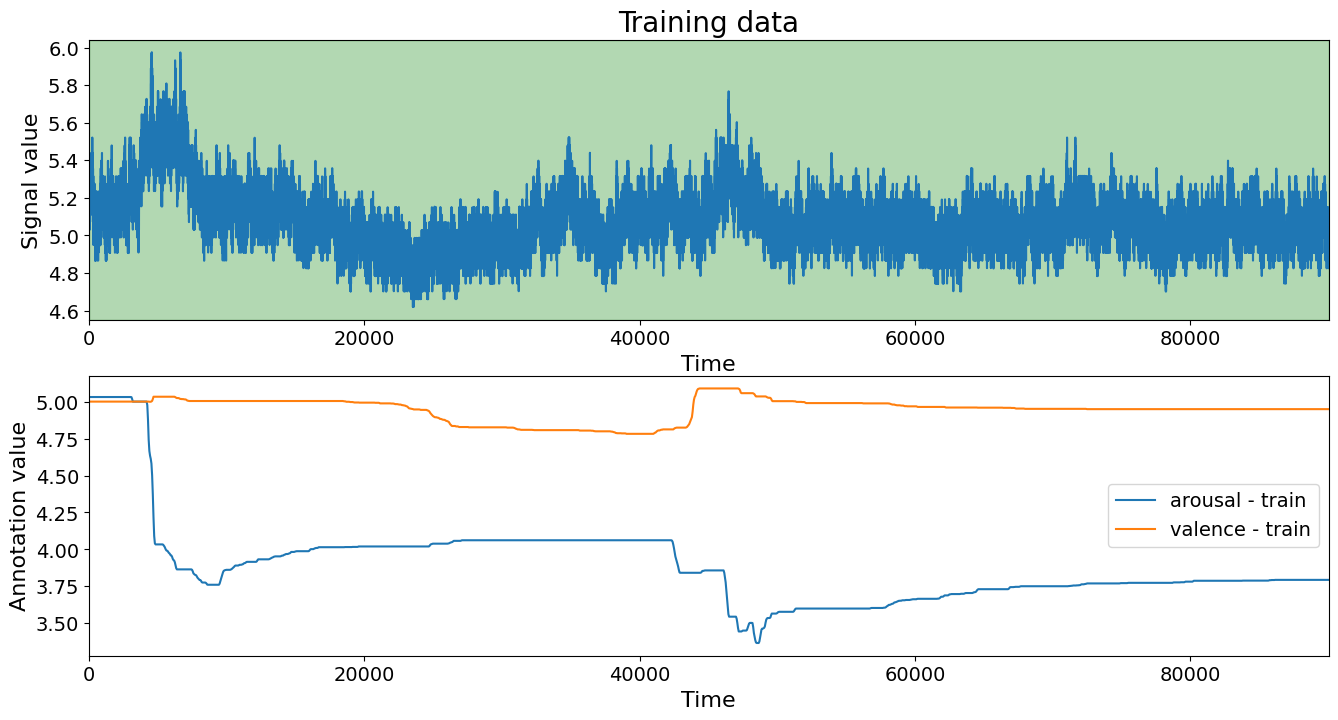

KeyError: -1

<Figure size 640x480 with 0 Axes>

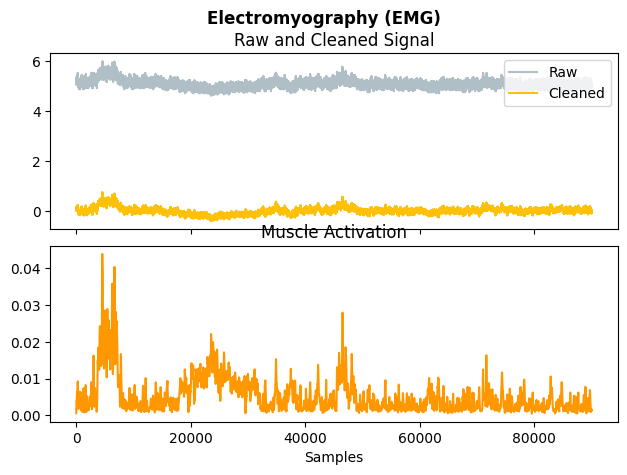

In [9]:
for (name, data, label) in train:
    print(name)
    plot_data('emg_zygo', label, data, test=False)
    plt.figure()
    plot_emg(data.emg_zygo)
    plt.show()

In [ ]:
for (name, data, label) in train:
    print(name)
    plot_data('emg_coru', label, data, test=False)
    plt.figure()
    plot_emg(data.gsr)
    plt.show()

In [ ]:
for (name, data, label) in train:
    print(name)
    plot_data('emg_trap', label, data, test=False)
    plt.figure()
    plot_emg(data.gsr)
    plt.show()

# First try
This section follows the explain_data notebook, just the data type was changed

In [3]:
# specify file name
file_name = "sub_1_vid_1.csv"

# load data files
train_physiology = pd.read_csv(Path("../data/scenario_1/train/physiology", file_name), index_col="time")
train_annotations = pd.read_csv(Path("../data/scenario_1/train/annotations", file_name), index_col="time")
test_physiology = pd.read_csv(Path("../data/scenario_1/test/physiology", file_name), index_col="time")
test_annotations = pd.read_csv(Path("../data/scenario_1/test/annotations", file_name), index_col="time")

In [5]:
train

In [5]:
train_annotations

,valence,arousal
time,,
0,5.000,5.000
50,5.000,5.000
100,5.000,5.000
150,5.000,5.000
200,5.000,5.000
...,...,...
102850,7.491,4.909
102900,7.491,4.909
102950,7.491,4.909


In [5]:
test_physiology

,ecg,bvp,gsr,rsp,skt,emg_zygo,emg_coru,emg_trap
time,,,,,,,,
0,1.063,36.157,8.382,33.360,26.227,12.872,7.083,7.083
1,1.056,35.544,8.370,33.350,26.227,13.199,7.042,7.123
2,1.050,35.691,8.429,33.369,26.227,13.527,7.082,7.165
3,1.063,35.798,8.476,33.389,26.234,13.978,7.205,7.246
4,1.069,35.876,8.368,33.389,26.248,14.389,7.206,7.288
...,...,...,...,...,...,...,...,...
49996,1.109,35.900,12.845,31.104,26.203,30.409,7.247,8.316
49997,1.093,36.002,12.818,31.076,26.189,30.165,7.125,8.315
49998,1.086,36.079,12.794,31.114,26.192,29.878,7.165,8.477


In [6]:
test_annotations

,valence,arousal
time,,
10000,NaN,NaN
10050,NaN,NaN
10100,NaN,NaN
10150,NaN,NaN
10200,NaN,NaN
...,...,...
39800,NaN,NaN
39850,NaN,NaN
39900,NaN,NaN


In [7]:
import matplotlib.pyplot as plt

def plot_data_comparison(train_annotations, train_physiology, test_annotations, test_physiology):
    fig = plt.figure(figsize=(32,40))
    fig.patch.set_facecolor('white')
    # plot train physiology with annotations range 
    plt.subplot(411)
    plt.plot(train_physiology.index, train_physiology['emg_coru'])
    plt.axvspan(train_annotations.index[0], train_annotations.index[-1], color='green', alpha=0.3)
    plt.xlim(left=test_physiology.index[0], right=test_physiology.index[-1])
    plt.title("Training data", fontsize=30)
    plt.ylabel("Signal value", fontsize=18)
    plt.xlabel("Time", fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # plot train annotations
    plt.subplot(412)
    plt.plot(train_annotations.index, train_annotations['arousal'], label='arousal - train')
    plt.plot(train_annotations.index, train_annotations['valence'], label='valence - train')
    plt.xlim(left=test_physiology.index[0], right=test_physiology.index[-1])
    plt.legend(fontsize=14)
    plt.ylabel("Annotation value", fontsize=18)
    plt.xlabel("Time", fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # plot test physiology with annotations range 
    plt.subplot(413)
    plt.plot(test_physiology.index, test_physiology['emg_coru'])
    plt.axvspan(test_annotations.index[0], test_annotations.index[-1], color='green', alpha=0.3)
    plt.xlim(left=test_physiology.index[0], right=test_physiology.index[-1])
    plt.title("Test data", fontsize=30)
    plt.ylabel("Signal value", fontsize=18)
    plt.xlabel("Time", fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # plot test annotations
    ax = plt.subplot(414)
    plt.plot(test_annotations.index, test_annotations['arousal'], label='arousal - test')
    plt.plot(test_annotations.index, test_annotations['valence'], label='valence - test')
    plt.xlim(left=test_physiology.index[0], right=test_physiology.index[-1])
    plt.xticks(fontsize=14)
    plt.yticks([test_annotations['arousal'].iloc[0]], ["NaN"], fontsize=14)
    plt.legend(fontsize=14)
    plt.ylabel("Annotation value", fontsize=18)
    plt.xlabel("Time", fontsize=18)
    plt.show()

Below you can see the example of train and test data:
- in training data annotations start and end with the physiological data. Every annotation point has arousal and valence values assigned.
- in test data annotations start 10s after the physiology, and end 10s before the physiology ends. Annotation points are specified, but arousal and valence values have been deleted. Your task is to predict arousal and valence values in the specified points in time.

In plots, green regions show the range of physiological signals covered by annotation points.

The above holds for all scenarios as shown below.

In [13]:
# specify file name
file_name = "sub_1_vid_1.csv"

# load data files
train_physiology = pd.read_csv(Path("../data/scenario_1/train/physiology", file_name), index_col="time")
train_annotations = pd.read_csv(Path("../data/scenario_1/train/annotations", file_name), index_col="time")
test_physiology = pd.read_csv(Path("../data/scenario_1/test/physiology", file_name), index_col="time")
test_annotations = pd.read_csv(Path("../data/scenario_1/test/annotations", file_name), index_col="time")

# change test_annotations from NA to -1 - only for plotting, so pyplot works ok 
test_annotations.loc[:] = -1 

plot_data_comparison(train_annotations, train_physiology, test_annotations, test_physiology)

NameError: name 'plot_data_comparison' is not defined

In [15]:
df, info = emg.emg_process(train_physiology.emg_coru, threshold=3, sampling_rate=1000)

In [16]:
info

{'EMG_Onsets': array([ 33685, 102050]),
 'EMG_Offsets': array([33896]),
 'EMG_Activity': array([33685., 33686., 33687., 33688., 33689., 33690., 33691., 33692.,
        33693., 33694., 33695., 33696., 33697., 33698., 33699., 33700.,
        33701., 33702., 33703., 33704., 33705., 33706., 33707., 33708.,
        33709., 33710., 33711., 33712., 33713., 33714., 33715., 33716.,
        33717., 33718., 33719., 33720., 33721., 33722., 33723., 33724.,
        33725., 33726., 33727., 33728., 33729., 33730., 33731., 33732.,
        33733., 33734., 33735., 33736., 33737., 33738., 33739., 33740.,
        33741., 33742., 33743., 33744., 33745., 33746., 33747., 33748.,
        33749., 33750., 33751., 33752., 33753., 33754., 33755., 33756.,
        33757., 33758., 33759., 33760., 33761., 33762., 33763., 33764.,
        33765., 33766., 33767., 33768., 33769., 33770., 33771., 33772.,
        33773., 33774., 33775., 33776., 33777., 33778., 33779., 33780.,
        33781., 33782., 33783., 33784., 33785., 

In [9]:
nk.emg_activation?

Signature:
nk.emg_activation(
    emg_amplitude=None,
    emg_cleaned=None,
    sampling_rate=1000,
    method='threshold',
    threshold='default',
    duration_min='default',
    size=None,
    threshold_size=None,
    **kwargs,
)
Docstring:
**Locate EMG Activity**

Detects onset in EMG signal based on the amplitude threshold.

Parameters
----------
emg_amplitude : array
    At least one EMG-related signal. Either the amplitude of the EMG signal, obtained from
    ``emg_amplitude()`` for methods like ``"threshold"`` or ``"mixture"``), and / or the
    cleaned EMG signal (for methods like ``"pelt"``, ``"biosppy"`` or ``"silva"``).
emg_cleaned : array
    At least one EMG-related signal. Either the amplitude of the EMG signal, obtained from
    ``emg_amplitude()`` for methods like ``"threshold"`` or ``"mixture"``), and / or the
    cleaned EMG signal (for methods like ``"pelt"``, ``"biosppy"`` or ``"silva"``).
sampling_rate : int
    The sampling frequency of ``emg_signal`` (in Hz, i.e

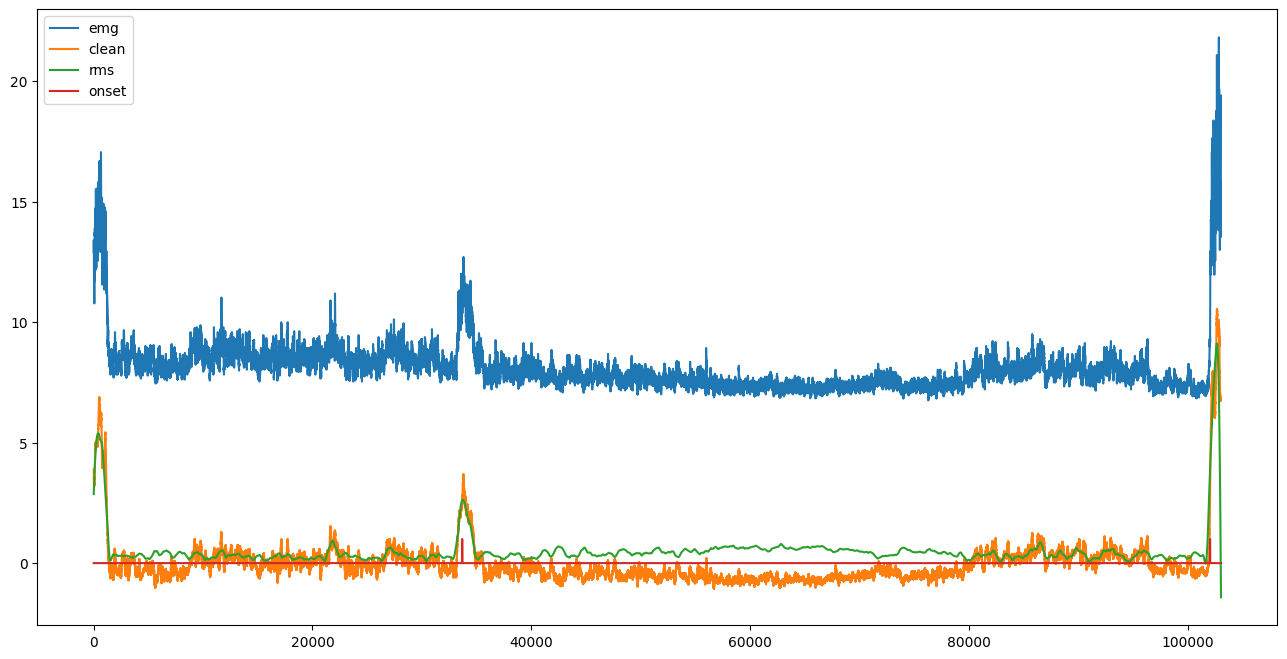

In [17]:
plt.figure(figsize=[16,8])
plt.plot(df.EMG_Raw, label='emg')
plt.plot(df.EMG_Clean, label='clean')
plt.plot(df.EMG_Rms, label='rms')
plt.plot(df.EMG_Onsets, label='onset')
plt.legend()

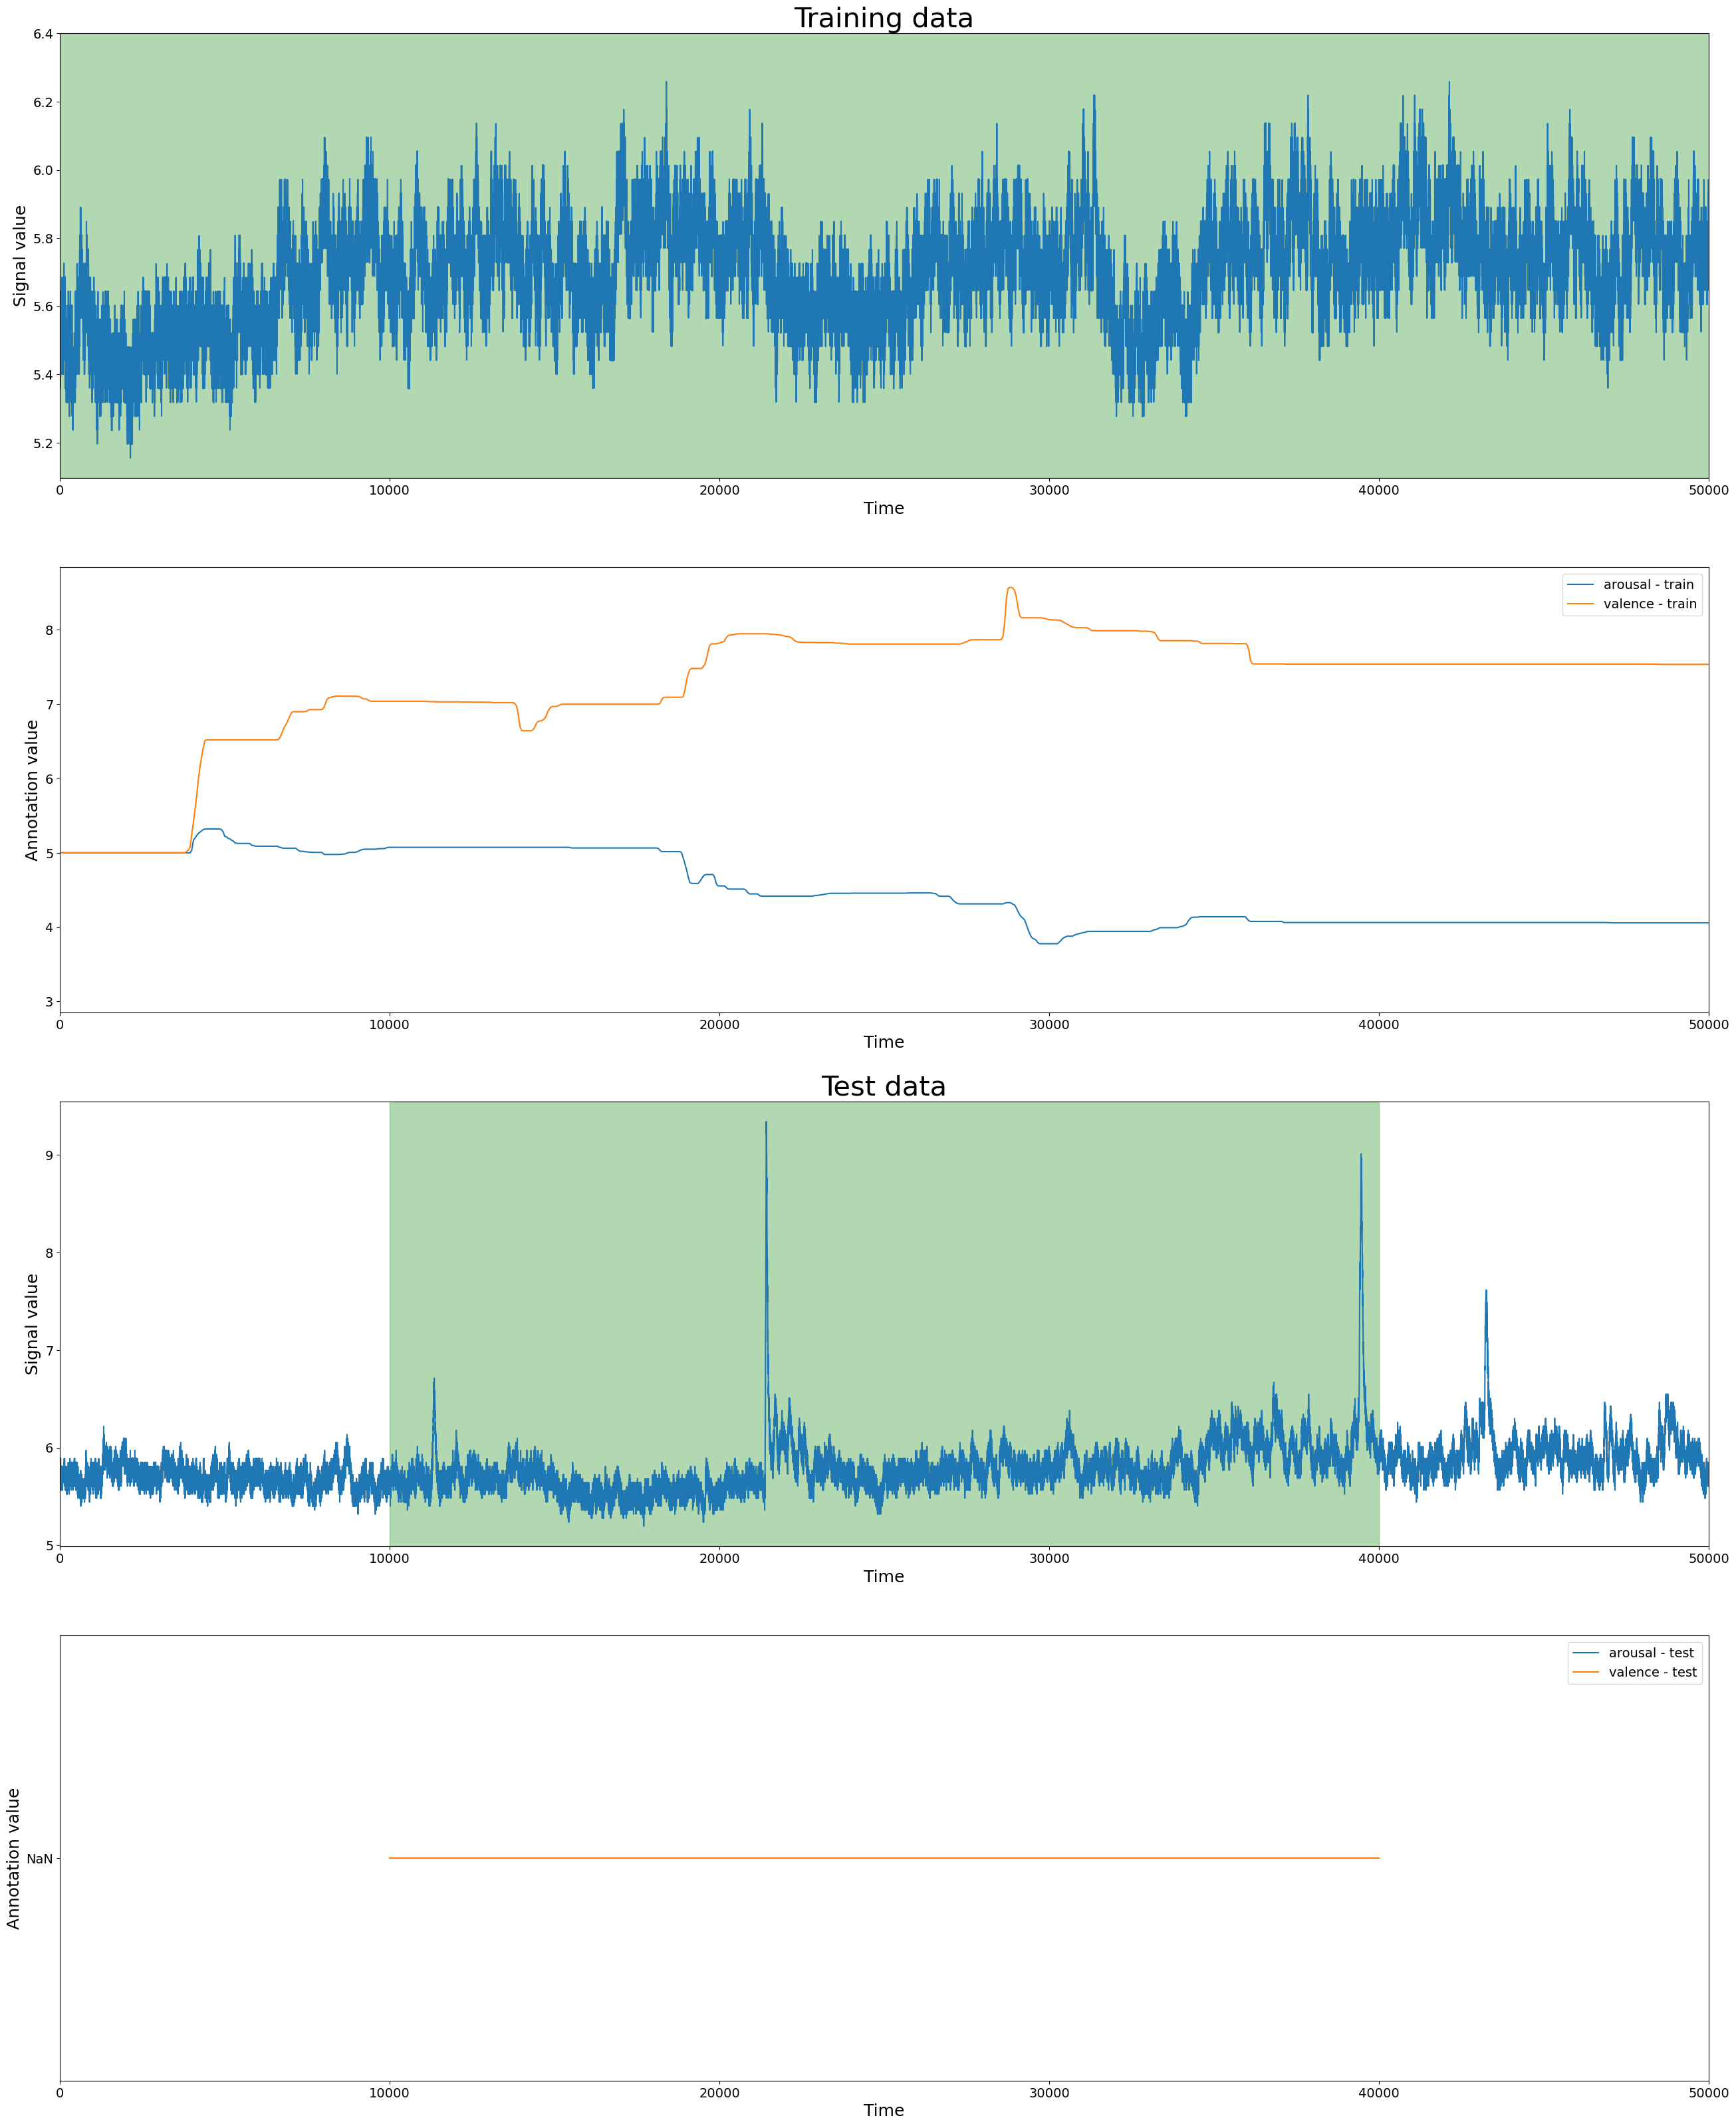

In [17]:
# specify files to load
train_file_name = "sub_0_vid_3.csv"
test_file_name = "sub_0_vid_0.csv"
# load data files
train_physiology = pd.read_csv(Path("../data/scenario_4/fold_0/train/physiology", train_file_name), index_col="time")
train_annotations = pd.read_csv(Path("../data/scenario_4/fold_0/train/annotations", train_file_name), index_col="time")
test_physiology = pd.read_csv(Path("../data/scenario_4/fold_0/test/physiology", test_file_name), index_col="time")
test_annotations = pd.read_csv(Path("../data/scenario_4/fold_0/test/annotations", test_file_name), index_col="time")
# change test_annotations from NA to -1 - only for plotting, so pyplot works ok 
test_annotations.loc[:] = -1
# plot
plot_data_comparison(train_annotations, train_physiology, test_annotations, test_physiology)